<a href="https://colab.research.google.com/github/saranyapalani/sample/blob/master/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('/content/drive/My Drive/lakh.csv',error_bad_lines=False)
data.head()


,ID,Case Number,Date,Primary Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10508693,HZ250496,05-03-2016 23:40,BATTERY,APARTMENT,True,10.0,24.0,29.0,1154907.0,1893681.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05-03-2016 21:40,BATTERY,RESIDENCE,False,3.0,20.0,42.0,1183066.0,1864330.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05-03-2016 23:31,PUBLIC PEACE VIOLATION,STREET,False,15.0,37.0,25.0,1140789.0,1904819.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05-03-2016 22:10,BATTERY,SIDEWALK,False,15.0,28.0,25.0,1143223.0,1901475.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05-03-2016 22:00,JEWEL THEFT MURDER,RESIDENCE,False,15.0,28.0,25.0,1139890.0,1901675.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
data.drop(['Case Number','X Coordinate', 'Y Coordinate','Year','Ward','Community Area', 'Location', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)
data.head()


,ID,Date,Primary Type,Location Description,Arrest
0,10508693,05-03-2016 23:40,BATTERY,APARTMENT,True
1,10508695,05-03-2016 21:40,BATTERY,RESIDENCE,False
2,10508697,05-03-2016 23:31,PUBLIC PEACE VIOLATION,STREET,False
3,10508698,05-03-2016 22:10,BATTERY,SIDEWALK,False
4,10508699,05-03-2016 22:00,JEWEL THEFT MURDER,RESIDENCE,False


In [6]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y %H:%M:%S')
data.head()

,ID,Date,Primary Type,Location Description,Arrest
0,10508693,2016-05-03 23:40:00,BATTERY,APARTMENT,True
1,10508695,2016-05-03 21:40:00,BATTERY,RESIDENCE,False
2,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,STREET,False
3,10508698,2016-05-03 22:10:00,BATTERY,SIDEWALK,False
4,10508699,2016-05-03 22:00:00,JEWEL THEFT MURDER,RESIDENCE,False


In [7]:
data.index = pd.DatetimeIndex(data.Date)
data.head()


,ID,Date,Primary Type,Location Description,Arrest
Date,,,,,
2016-05-03 23:40:00,10508693,2016-05-03 23:40:00,BATTERY,APARTMENT,True
2016-05-03 21:40:00,10508695,2016-05-03 21:40:00,BATTERY,RESIDENCE,False
2016-05-03 23:31:00,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,STREET,False
2016-05-03 22:10:00,10508698,2016-05-03 22:10:00,BATTERY,SIDEWALK,False
2016-05-03 22:00:00,10508699,2016-05-03 22:00:00,JEWEL THEFT MURDER,RESIDENCE,False


In [0]:
Groups = data.groupby(data['Primary Type'])
Groups = dict(list(Groups))
theft_data = [Groups['JEWEL THEFT MURDER']]
theft_data = pd.concat(theft_data, axis = 0)
del Groups
del data

In [10]:
theft_prophet = theft_data.resample('M').size().reset_index()
theft_prophet.columns = ['Date', 'Crime Count']
theft_prophet.head()

,Date,Crime Count
0,2012-01-31,5709
1,2012-02-29,4886
2,2012-03-31,5934
3,2012-04-30,6189
4,2012-05-31,6463


In [11]:
theft_prophet_df = pd.DataFrame(theft_prophet)
theft_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [12]:
theft_prophet_data = theft_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
theft_prophet_data.head()


,ds,y
0,2012-01-31,5709
1,2012-02-29,4886
2,2012-03-31,5934
3,2012-04-30,6189
4,2012-05-31,6463


In [0]:
from fbprophet import Prophet
m = Prophet()


In [14]:
m.fit(theft_prophet_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=730)
future

,ds
0,2012-01-31
1,2012-02-29
2,2012-03-31
3,2012-04-30
4,2012-05-31
...,...
778,2018-05-27
779,2018-05-28
780,2018-05-29
781,2018-05-30


In [0]:
forecast = m.predict(future)

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,7386.415296,5014.781838,8309.698767,7386.415296,7386.415296,-754.819134,-754.819134,-754.819134,-754.819134,-754.819134,-754.819134,0.0,0.0,0.0,6631.596162
1,2012-02-29,7260.293513,4308.796946,7705.223974,7260.293513,7260.293513,-1320.039621,-1320.039621,-1320.039621,-1320.039621,-1320.039621,-1320.039621,0.0,0.0,0.0,5940.253892
2,2012-03-31,7125.473675,4739.518637,7963.877772,7125.473675,7125.473675,-779.486420,-779.486420,-779.486420,-779.486420,-779.486420,-779.486420,0.0,0.0,0.0,6345.987255
3,2012-04-30,6995.002865,5181.040934,8508.713304,6995.002865,6995.002865,-193.221612,-193.221612,-193.221612,-193.221612,-193.221612,-193.221612,0.0,0.0,0.0,6801.781253
4,2012-05-31,6860.183028,6990.281028,10303.330825,6860.183028,6860.183028,1740.375370,1740.375370,1740.375370,1740.375370,1740.375370,1740.375370,0.0,0.0,0.0,8600.558398


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
778,2018-05-27,-2651.255707,-16619.466590,-13290.992482,-2651.263830,-2651.247188,-12366.734163,-12366.734163,-12366.734163,-12366.734163,-12366.734163,-12366.734163,0.0,0.0,0.0,-15017.989870
779,2018-05-28,-2655.604818,-13688.577090,-10451.393491,-2655.612958,-2655.596286,-9358.600055,-9358.600055,-9358.600055,-9358.600055,-9358.600055,-9358.600055,0.0,0.0,0.0,-12014.204874
780,2018-05-29,-2659.953930,-10702.969074,-7126.988769,-2659.962087,-2659.945380,-6225.491998,-6225.491998,-6225.491998,-6225.491998,-6225.491998,-6225.491998,0.0,0.0,0.0,-8885.445928
781,2018-05-30,-2664.303041,-7324.094709,-4123.744078,-2664.311215,-2664.294469,-3030.188343,-3030.188343,-3030.188343,-3030.188343,-3030.188343,-3030.188343,0.0,0.0,0.0,-5694.491384
782,2018-05-31,-2668.652152,-4160.094730,-869.560228,-2668.660344,-2668.643557,163.687098,163.687098,163.687098,163.687098,163.687098,163.687098,0.0,0.0,0.0,-2504.965054


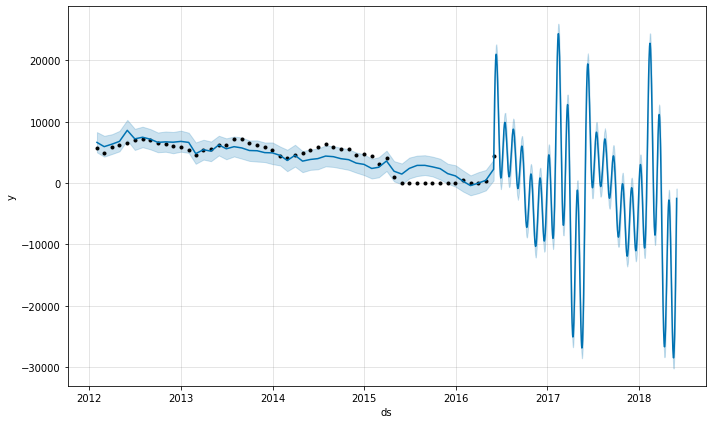

In [19]:
m.plot(forecast);

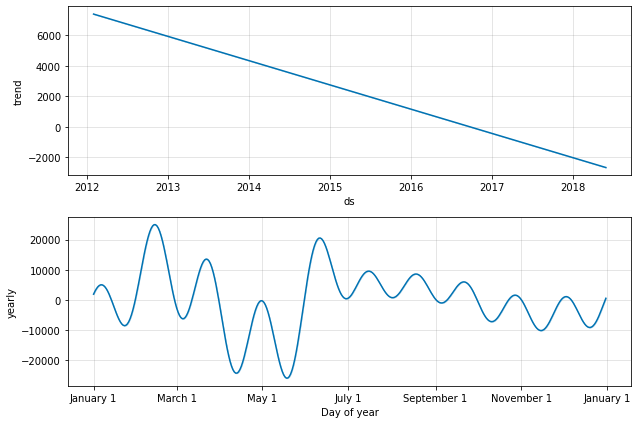

In [20]:
m.plot_components(forecast);

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [0]:
metric_df = forecast.set_index('ds')[['yhat']].join(theft_prophet_data.set_index('ds').y).reset_index()

In [0]:
metric_df.dropna(inplace=True)

In [25]:
metric_df.head()

,ds,yhat,y
0,2012-01-31,6631.596162,5709.0
1,2012-02-29,5940.253892,4886.0
2,2012-03-31,6345.987255,5934.0
3,2012-04-30,6801.781253,6189.0
4,2012-05-31,8600.558398,6463.0


In [26]:
r2_score(metric_df.y, metric_df.yhat)

0.7245251955944236

In [27]:
mean_squared_error(metric_df.y, metric_df.yhat)

1723770.8276805675

In [32]:
mean_absolute_error(metric_df.y, metric_df.yhat)

1038.4489348253376